In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Создадим модель
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(2, activation='relu', input_shape=(2,), name='hidden_layer_1'),
  # tf.keras.layers.Dropout(0.2, name='dropout'),
  # tf.keras.layers.Dense(10, name='hidden_layer_2')
  tf.keras.layers.Dense(1)
])
model.summary()

C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 2)                 │          6 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 1)                 │          3 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Скомпилируем
model.compile(
    optimizer='Adam',
    loss='sign',
    metrics=['mean_absolute_error']
)

In [5]:
X = np.array([
    [36, 1],    # 36 градусов, есть солнце 
    [37, 1],    # 37 градусов, есть солнце
    [36, 0],    # 36 градусов, нет солнца
    [37, 0],    # 37 градусов, нет солнца
])
 
Y = np.array([
    1, # открыты
    0, # закрыты
    0, # закрыты
    0, # закрыты
])
# Обучим
model.fit(
    X, # Набор входных данных
    Y, # Набор правильных ответов
    validation_split=0.7, # Этот параметр автоматически выделит часть обучающего набора на валидационные данные. В данном случа 20%
    epochs=100, # Процесс обучения завершится после 10 эпох
    batch_size = 8 # Набор данных будет разбит на пакеты (батчи) по 8 элементов набора в каждом. 
)

Epoch 1/100


ValueError: Could not interpret loss identifier: sign

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


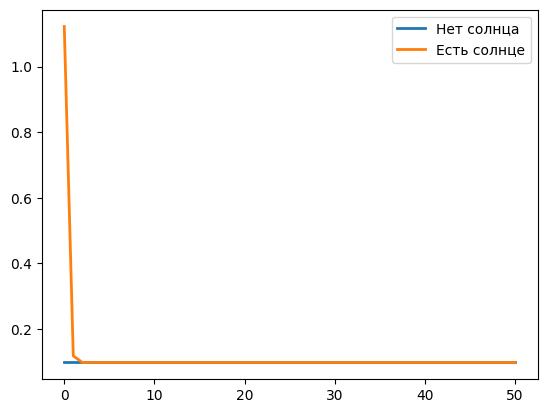

In [61]:
sun = 0
X_test = []
for C in range(0, 51):
  X_test.append([C, sun])
X_test = np.array(X_test)
feedforwardsNoSun = model.predict(X_test)
sun = 1
X_test = []
for C in range(0, 51):
  X_test.append([C, sun])
X_test = np.array(X_test)
feedforwardsSun = model.predict(X_test)

fig, ax = plt.subplots()

ax.plot([C for C in range(0, 51)], feedforwardsNoSun, linewidth=2.0, label='Нет солнца')

ax.plot([C for C in range(0, 51)], feedforwardsSun, linewidth=2.0, label='Есть солнце')
ax.legend()
plt.show()